# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1313ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1313_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,8.255,62.7865,0.00317
1,8.043,61.1248,0.00309
2,7.845,59.7543,0.00302
3,7.669,57.9834,0.00293
4,7.464,56.5542,0.00286


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [8.255, 8.043, 7.845, 7.669, 7.464, 7.252, 7.083, 6.892, 6.68, 6.489, 6.334, 6.129, 5.953, 5.769, 5.578, 5.409, 5.225, 5.056, 4.915, 4.717, 4.562, 4.385, 4.209, 4.046, 3.884, 3.7, 3.51, 3.291, 2.98, 2.994, 3.001, 2.994, 2.966, 2.966, 2.966, 2.945, 2.959, 2.952, 2.938, 2.923, 2.923, 2.909, 2.895, 2.895, 2.895, 2.881, 2.839, 0.099, 0.113, 0.113, 0.099, 0.113, 0.113, 0.099, 0.113, 0.113, 0.106, 0.106, -2.733, -2.733, -2.74, -2.747, -2.761, -2.761, -2.775, -2.775, -2.789, -3.156, -3.375, -3.552, -3.764, -3.898, -4.089, -4.272, -4.456, -4.625, -4.809, -5.007, -5.19, -5.331, -5.543, -5.734, -5.903, -6.101, -6.313, -6.518, -6.687, -6.906, -7.061, -7.344, -7.513, -7.739, -7.937, -7.81, -7.478, -7.09, -6.814, -6.44, -6.129, -5.783, -5.515, -5.197, -4.894, -4.576, -4.3, -4.018, -3.721, -3.425, -2.93, -2.846, -2.817, -2.832, -2.81, -2.803, -2.775, -2.761, -2.74, -2.747, -2.719, -2.69, 0.042, 0.049, 0.049, 0.042, 0.042, 0.057, 0.035, 2.881, 2.909, 2.895, 2.923, 2.938, 2.938, 3.474, 3.743, 4.0

In [5]:
lower_limit = V.index(0.049) + 5
upper_limit = V.index(4.3)

print(lower_limit)

126


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.035 2.881 2.909 2.895 2.923 2.938 2.938 3.474 3.743 4.039]
I =  [11.4237 13.3583 15.1374 17.2044 19.2625 21.0239 23.4006 25.415  27.5775
 29.4569]


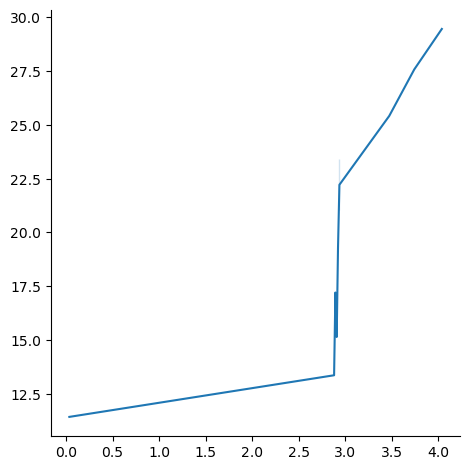

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

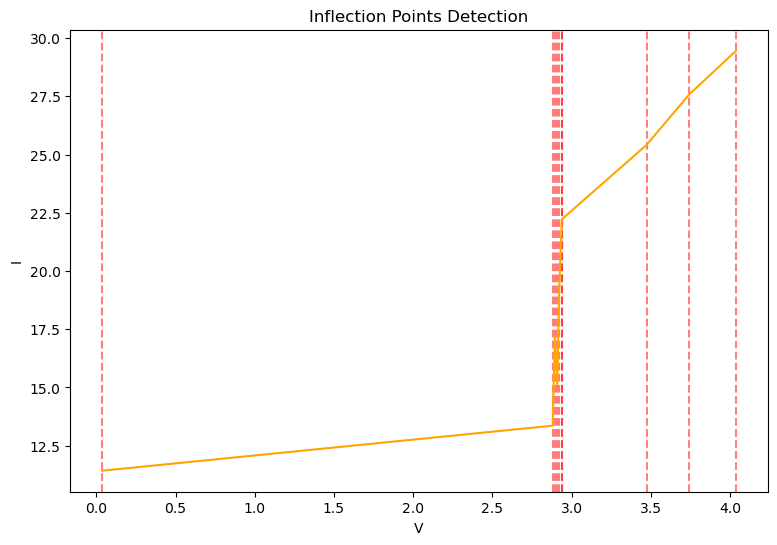

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

In [9]:
#Preview the inflection points array
inflection_points = []

### Clear the graph above to focus on Ic and Vc

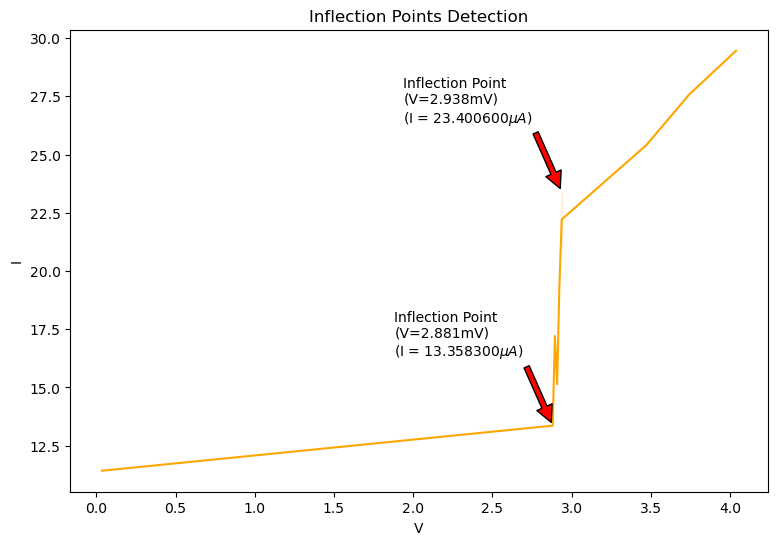

In [10]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 5]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [11]:
#Preview the main dataset
print(list(df[0]))

[8.255, 8.043, 7.845, 7.669, 7.464, 7.252, 7.083, 6.892, 6.68, 6.489, 6.334, 6.129, 5.953, 5.769, 5.578, 5.409, 5.225, 5.056, 4.915, 4.717, 4.562, 4.385, 4.209, 4.046, 3.884, 3.7, 3.51, 3.291, 2.98, 2.994, 3.001, 2.994, 2.966, 2.966, 2.966, 2.945, 2.959, 2.952, 2.938, 2.923, 2.923, 2.909, 2.895, 2.895, 2.895, 2.881, 2.839, 0.099, 0.113, 0.113, 0.099, 0.113, 0.113, 0.099, 0.113, 0.113, 0.106, 0.106, -2.733, -2.733, -2.74, -2.747, -2.761, -2.761, -2.775, -2.775, -2.789, -3.156, -3.375, -3.552, -3.764, -3.898, -4.089, -4.272, -4.456, -4.625, -4.809, -5.007, -5.19, -5.331, -5.543, -5.734, -5.903, -6.101, -6.313, -6.518, -6.687, -6.906, -7.061, -7.344, -7.513, -7.739, -7.937, -7.81, -7.478, -7.09, -6.814, -6.44, -6.129, -5.783, -5.515, -5.197, -4.894, -4.576, -4.3, -4.018, -3.721, -3.425, -2.93, -2.846, -2.817, -2.832, -2.81, -2.803, -2.775, -2.761, -2.74, -2.747, -2.719, -2.69, 0.042, 0.049, 0.049, 0.042, 0.042, 0.057, 0.035, 2.881, 2.909, 2.895, 2.923, 2.938, 2.938, 3.474, 3.743, 4.039, 4

In [12]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

print(find_last_occurrence(2.938, list(df[0]))) #the second change point above
print(list(df[0]).index(df[0].max()))

132
150


In [13]:
#Select data from the first pass
V_n = np.array(df[0][132:150])
I_n = np.array(df[1][132:150])

#Preview the data
print(V_n)
print(I_n)

[2.938 3.474 3.743 4.039 4.3   4.555 4.816 5.098 5.423 5.706 5.988 6.32
 6.567 6.878 7.203 7.52  7.838 8.128]
[23.4006 25.415  27.5775 29.4569 31.9455 34.0807 36.3728 38.4828 40.6739
 42.9524 45.4157 47.6723 50.4897 52.6836 55.3931 57.5802 60.4119 62.8759]


## Define the model and fit the data

In [14]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.0213))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 18
    # variables        = 2
    chi-square         = 16.0065203
    reduced chi-square = 1.00040752
    Akaike info crit   = 1.88723923
    Bayesian info crit = 3.66798275
    R-squared          = 1.00000000
[[Variables]]
    slope:      7725.31540 +/- 132.105818 (1.71%) (init = 7884.952)
    intercept: -832963.330 +/- 647572.280 (77.74%) (init = -1656957)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9578


## Plot the model

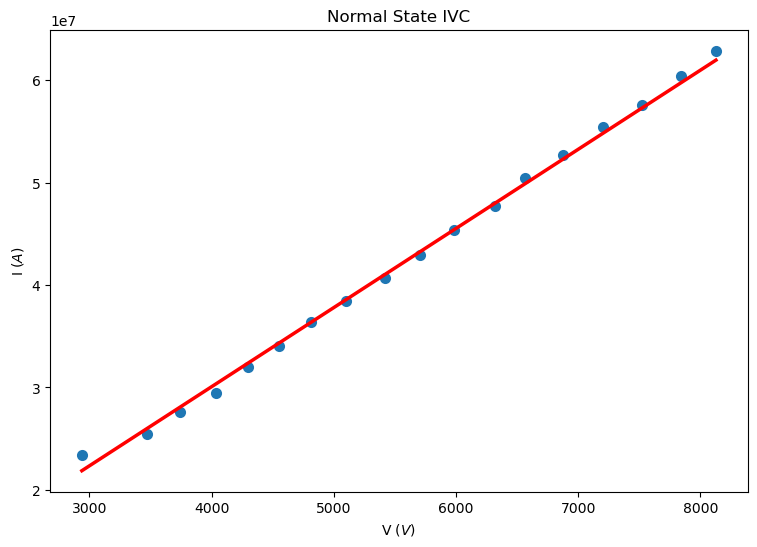

In [15]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [16]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7725.31539521906, 'intercept': -832963.3304801199}

In [17]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000129 Ohm


In [18]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.52059927 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.52059927 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.8029869598996915e-22 J
Gap Energy = 5.605973919799383e-22 J
Gap Voltage = 3.498922681187981 mV
Josephson Current = 20.758783932704798 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.1731266967166435e-22 J
Gap Energy =  4.346253393433287e-22 J
Gap Voltage = 2.7126784380434943 mV
Josephson Current = 15.4768335612157 uA
________________________________
________________________________
________________________________


In [19]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[5], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 23.4006, 'Ic_weak': 20.7588, 'Ic_strong': 15.4768, 'V_gap': 2.881, 'Vg_weak': 3.4989, 'Vg_strong': 2.7127, 'Temp': 4.5206}


## Export the results to a csv file

In [21]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>